In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
data = load_iris()

In [3]:
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
data_np = np.array(data.data)
df = pd.DataFrame(data_np)

In [7]:
df['petal_length'] = df[2]
df['petal_width'] = df[3]
df = df.drop(axis = 'column', columns=[0,1,2,3])

In [8]:
df

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [9]:
df.isnull().value_counts()

petal_length  petal_width
False         False          150
Name: count, dtype: int64

Text(0, 0.5, 'Petal Width')

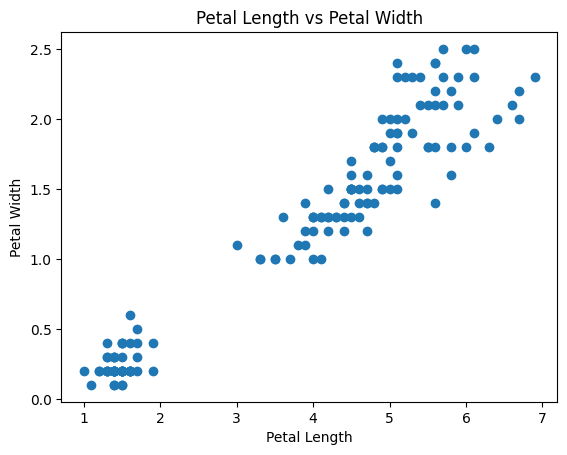

In [10]:

x = df['petal_length']
y = df['petal_width']

plt.scatter(x, y)
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [11]:
km = KMeans(n_clusters = 2)

## Value of K (SSD) and Elbow Plot

In [12]:
sse = []
k_range = range(1, 11)
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(df[['petal_length', 'petal_width']])
    # km.inertia gives squraed distance
    sse.append(km.inertia_)

Text(0.5, 1.0, 'Elbow Plot')

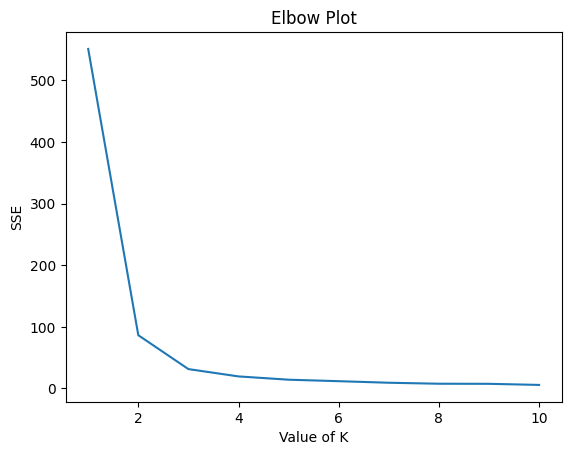

In [13]:
plt.plot(k_range, sse)
plt.xlabel('Value of K')
plt.ylabel('SSE')
plt.title('Elbow Plot')

### K = 3 

In [17]:
km = KMeans(n_clusters = 3)
cluster = km.fit_predict(df[['petal_length', 'petal_width']])

In [19]:
df['cluster'] = cluster
df.head()

,petal_length,petal_width,cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [20]:
df['cluster'].value_counts()

cluster
2    52
1    50
0    48
Name: count, dtype: int64

Text(0.5, 1.0, 'Clustering plot petal len vs petal width')

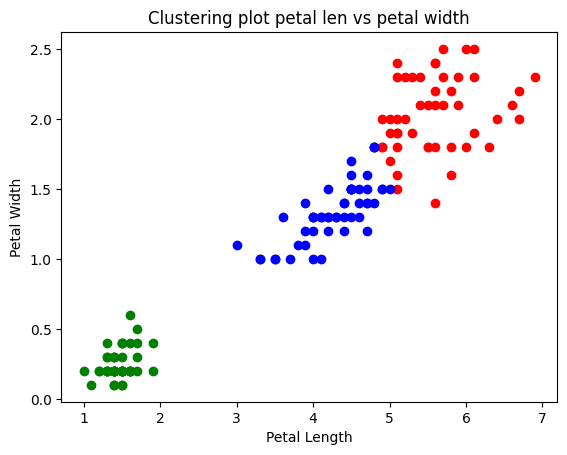

In [23]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.petal_length, df1.petal_width, color = 'red')
plt.scatter(df2.petal_length, df2.petal_width, color = 'green')
plt.scatter(df3.petal_length, df3.petal_width, color = 'blue')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Clustering plot petal len vs petal width')

In [24]:
df

,petal_length,petal_width,cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,0
146,5.0,1.9,0
147,5.2,2.0,0
148,5.4,2.3,0


In [25]:
df['flower'] = data.target

In [26]:
df

,petal_length,petal_width,cluster,flower
0,1.4,0.2,1,0
1,1.4,0.2,1,0
2,1.3,0.2,1,0
3,1.5,0.2,1,0
4,1.4,0.2,1,0
...,...,...,...,...
145,5.2,2.3,0,2
146,5.0,1.9,0,2
147,5.2,2.0,0,2
148,5.4,2.3,0,2


In [30]:
print(df.to_string())

     petal_length  petal_width  cluster  flower
0             1.4          0.2        1       0
1             1.4          0.2        1       0
2             1.3          0.2        1       0
3             1.5          0.2        1       0
4             1.4          0.2        1       0
5             1.7          0.4        1       0
6             1.4          0.3        1       0
7             1.5          0.2        1       0
8             1.4          0.2        1       0
9             1.5          0.1        1       0
10            1.5          0.2        1       0
11            1.6          0.2        1       0
12            1.4          0.1        1       0
13            1.1          0.1        1       0
14            1.2          0.2        1       0
15            1.5          0.4        1       0
16            1.3          0.4        1       0
17            1.4          0.3        1       0
18            1.7          0.3        1       0
19            1.5          0.3        1 